In [ ]:
from linear_regression import LinearRegression

import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

# from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("Assets/Datasets/tsla_2025.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by="Date")

In [ ]:
X = df[['Open', 'High', 'Low', 'Volume']]
df['Next_Close'] = df['Close'].shift(-1)    
y = df['Next_Close']
X = X.iloc[:-1]  
y = y.iloc[:-1]

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [ ]:
model = LinearRegression(X_train, y_train, alpha = 0.0009, iter_num=100000)
print("\nFinal Parameters:")
print(f"Weight (w): {model.w}")
print(f"Bias (b): {model.b}")

y_pred = model.regression(X_test)
print(y_pred)



In [ ]:
j_hist = model.j_history

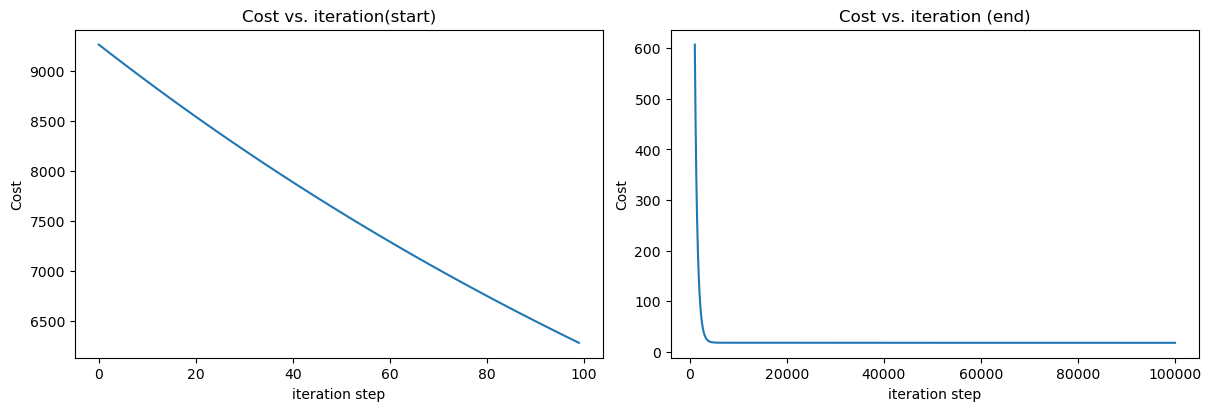

In [11]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(j_hist[:100])
ax2.plot(1000 + np.arange(len(j_hist[1000:])), j_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [12]:
predictions_df = pd.DataFrame({'Actual_Close': y_test, 'Predicted_Close': y_pred})
print(predictions_df.head())

      Actual_Close  Predicted_Close
2059       19.2633        21.542604
1105       17.1800        18.498046
818        12.8913        14.094404
1237       16.6300        18.167023
463         2.2520         3.761352


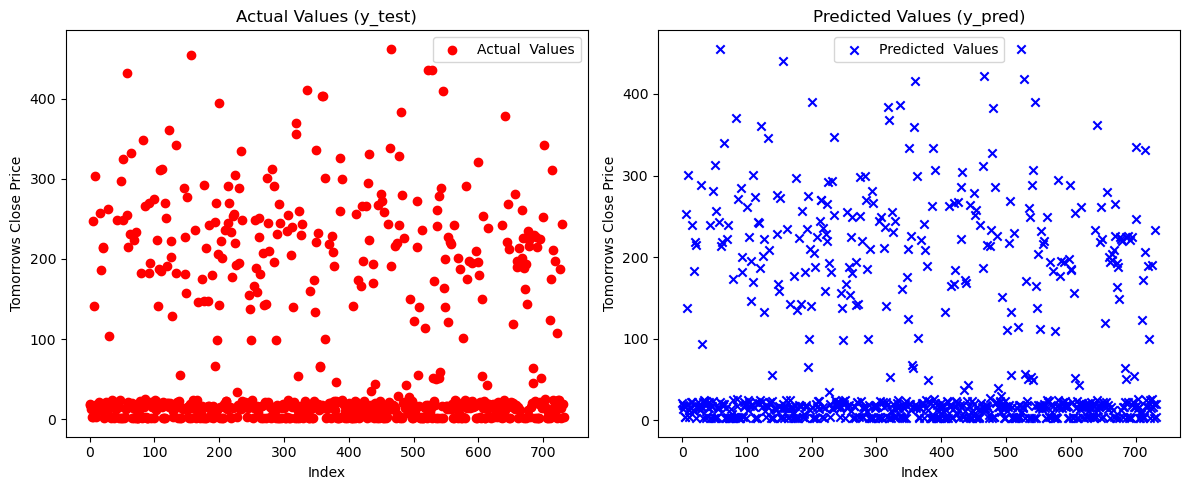

In [22]:

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for actual values
ax[0].scatter(range(len(y_test)), y_test, color='red', marker='o', label="Actual  Values")
ax[0].set_title("Actual Values (y_test)")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Tomorrows Close Price")
ax[0].legend()

# Scatter plot for predicted values
ax[1].scatter(range(len(y_pred)), y_pred, color='blue', marker='x', label="Predicted  Values")
ax[1].set_title("Predicted Values (y_pred)")
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Tomorrows Close Price")
ax[1].legend()

plt.tight_layout()
plt.show()


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 41.0264
Mean Absolute Error (MAE): 3.5359
R² Score: 0.9966
